# A. Enfoque de validación
##ACA ESTAN LAS BASES DE DATOS Y UNA MUESTRA DE QUE ESTAN BIEN

In [2]:
import numpy as np
import pandas as pd
import os
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split

In [3]:
norespondieron = pd.read_excel("norespondieron.xlsx")
respondieron = pd.read_excel("respondieron.xlsx")
print(norespondieron.shape)
print(respondieron.shape)
print(norespondieron.columns.tolist())
print(respondieron.columns.tolist())

(2985, 23)
(12866, 26)
['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'REGION', 'ANO4', 'CH04', 'CH06', 'CH07', 'CH08', 'CH12', 'CH13', 'CH14', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'PP10A', 'PP03J', 'PP04A', 'P21', 'P47T', 'ITF', 'IPCF', 'adulto_equiv']
['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'REGION', 'ANO4', 'CH04', 'CH06', 'CH07', 'CH08', 'CH12', 'CH13', 'CH14', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'PP10A', 'PP03J', 'PP04A', 'P21', 'P47T', 'ITF', 'IPCF', 'adulto_equiv', 'ad_equiv_hogar', 'ingreso_necesario', 'pobre']


In [4]:
# Obtener los tipos de datos de cada df
tipos_no = norespondieron.dtypes.rename("norespondieron")
tipos_re = respondieron.dtypes.rename("respondieron")

# Unirlos en un solo DataFrame
comparacion_tipos = pd.concat([tipos_no, tipos_re], axis=1)

# Mostrar el cuadro resultante
print(comparacion_tipos)

                  norespondieron respondieron
CODUSU                    object       object
NRO_HOGAR                  int64        int64
COMPONENTE                 int64        int64
REGION                     int64        int64
ANO4                       int64        int64
CH04                       int64        int64
CH06                       int64        int64
CH07                       int64        int64
CH08                       int64        int64
CH12                       int64        int64
CH13                       int64        int64
CH14                       int64        int64
NIVEL_ED                   int64        int64
ESTADO                     int64        int64
CAT_INAC                   int64        int64
PP10A                      int64        int64
PP03J                      int64        int64
PP04A                      int64        int64
P21                        int64        int64
P47T                       int64        int64
ITF                        int64  

In [5]:
# creamos las variables a usar, la variables dependiente y variables independientes
variables_X = ['ANO4', 'CH04','CH06','CH07','CH08','NIVEL_ED','CAT_INAC', 'ESTADO']
variable_y = 'pobre'

# Crear X e y
X = respondieron[variables_X].copy()
y = respondieron[variable_y]

# Agregar columna de unos para el intercepto
X.insert(0, 'const', 1)

In [6]:
# Separar en train y test (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=444
)

### Ejercicio 1

In [7]:
# creamos las variables a usar, la variables dependiente y variables independientes
variables_X = ['ANO4', 'CH04','CH06','CH07','CH08','NIVEL_ED','CAT_INAC', 'ESTADO']
variable_y = 'pobre'

# Crear X e y
X = respondieron[variables_X].copy()
y = respondieron[variable_y]

# Agregar columna de unos para el intercepto
X.insert(0, 'const', 1)

# Separar en train y test (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=444
)

In [8]:
# Calcular medias en train y test
media_train = X_train.mean()
media_test = X_test.mean()

In [9]:
# Calcular diferencia de medias
diferencias = media_train - media_test

In [49]:
# Crear tabla resumen
tabla_dif = pd.DataFrame({
    'Media_Train': media_train,
    'Media_Test': media_test,
    'Diferencia': diferencias
}).round(3)

print(tabla_dif)

          Media_Train  Media_Test  Diferencia
const           1.000       1.000       0.000
ANO4         2011.587    2011.352       0.234
CH04            1.527       1.520       0.007
CH06           35.880      36.033      -0.153
CH07            3.463       3.474      -0.011
CH08            2.311       2.300       0.011
NIVEL_ED        3.540       3.517       0.023
CAT_INAC        1.644       1.640       0.004
ESTADO          2.201       2.201      -0.000


### Ejercicio 2: separar por años

In [11]:
respondieron_2025 = respondieron[respondieron['ANO4'] == 2025].reset_index(drop=True)
respondieron_2005 = respondieron[respondieron['ANO4'] == 2005].reset_index(drop=True)

norespondieron_2025 = norespondieron[respondieron['ANO4'] == 2025].reset_index(drop=True)
norespondieron_2005 = norespondieron[respondieron['ANO4'] == 2005].reset_index(drop=True)



/tmp/ipython-input-1894767855.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  norespondieron_2025 = norespondieron[respondieron['ANO4'] == 2025].reset_index(drop=True)
/tmp/ipython-input-1894767855.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  norespondieron_2005 = norespondieron[respondieron['ANO4'] == 2005].reset_index(drop=True)


# B) Modelo de regresión logistica

### Ejercicio 3: estimación y efectos marginales

In [51]:
# Crear X e y de respondieron_2025
variables_X = ['CH04','CH06','CH07','CH08','NIVEL_ED','CAT_INAC', 'ESTADO'] # quitamos año respecto a la definicion anterior
variable_y = 'pobre'

X = respondieron_2025[variables_X].copy()
y = respondieron_2025[variable_y]

# Agregar columna de unos para el intercepto
X.insert(0, 'const', 1)

# Separar en train y test (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=444
)

In [50]:
# Estimamos el modelo de regresion logistica
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# obtenemos los coeficientes, errores estandard y los odd ratios
coefficients = result.params
standard_errors = result.bse
odd_ratios = np.exp(coefficients)

# Creamos una tabla para ver los resultados
results_table = pd.DataFrame({
    'Coeficiente': coefficients,
    'Error Estándar': standard_errors,
    'Odd Ratio': odd_ratios
})

print(results_table)

Optimization terminated successfully.
         Current function value: 0.513666
         Iterations 6
          Coeficiente  Error Estándar  Odd Ratio
const        0.636675        0.280453   1.890186
CH04         0.087945        0.091419   1.091928
CH06        -0.025226        0.002616   0.975089
CH07        -0.108007        0.034348   0.897621
CH08         0.286849        0.022801   1.332223
NIVEL_ED    -0.272189        0.027386   0.761711
CAT_INAC     0.276583        0.043800   1.318617
ESTADO      -0.241040        0.083102   0.785811


In [14]:
# Calculo los efectos marginales promedio
marginal_effects = result.get_margeff(at="overall", method="dydx")

# mostramos los efectos marginales
print(marginal_effects.summary())

        Logit Marginal Effects       
Dep. Variable:                  pobre
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CH04           0.0150      0.016      0.963      0.336      -0.016       0.045
CH06          -0.0043      0.000    -10.123      0.000      -0.005      -0.003
CH07          -0.0184      0.006     -3.160      0.002      -0.030      -0.007
CH08           0.0488      0.003     13.948      0.000       0.042       0.056
NIVEL_ED      -0.0463      0.004    -10.531      0.000      -0.055      -0.038
CAT_INAC       0.0470      0.007      6.437      0.000       0.033       0.061
ESTADO        -0.0410      0.014     -2.908      0.004      -0.069      -0.013


### Ejercicio 4: visualización

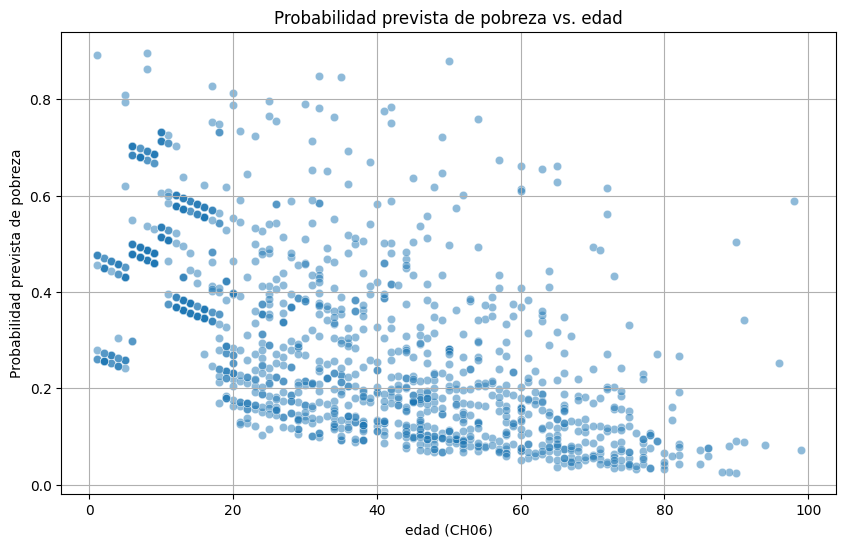

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predecimos las probabilidades
predicted_probabilities = result.predict(X_test)

# Creamos un DataFrame para graficar
plot_data = pd.DataFrame({
    'edad': X_test['CH06'],
    'Probabilidad_prevista_pobreza': predicted_probabilities
})

# Creamos el diagrama de dispersion
plt.figure(figsize=(10, 6))
sns.scatterplot(x='edad', y='Probabilidad_prevista_pobreza', data=plot_data, alpha=0.5)
plt.title('Probabilidad prevista de pobreza vs. edad')
plt.xlabel('edad (CH06)')
plt.ylabel('Probabilidad prevista de pobreza')
plt.grid(True)
plt.show()

# C. Método de Vecinos Cercanos (KNN)

### Ejercicio 5: Estimación

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Definimos los valores de k a utilizar
k_values = [1, 5, 10]

# Iteramos a través de los diferentes valores de K
for k in k_values:
    # Iniciamos el clasificador knn
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Ajustamos los datos al training
    knn_model.fit(X_train, y_train)

    # Predicción basada en los datos de entrenamiento (a modo de demostración)
    y_train_pred = knn_model.predict(X_train)

    print(f"KNN modelo con K={k} instalado.")

    # Calculamos la precisión en los datos de entrenamiento
    #Aca se  puede agregar código para evaluar el modelo en el conjunto de prueba si es necesario.
    #Por ejemplo:
    # accuracy = accuracy_score(y_test, y_test_pred)
    # print(f"Accuracy for K={k}: {accuracy:.4f}")

KNN modelo con K=1 instalado.
KNN modelo con K=5 instalado.
KNN modelo con K=10 instalado.


In [17]:
from sklearn.metrics import classification_report, confusion_matrix

# iteramos a traves de los distintos valores de k
for k in k_values:
    print(f"\n--- Resultados para K = {k} ---")
    # Iniciamos el clasificador KNN
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Ajustar el modelo a los datos de entrenamiento
    knn_model.fit(X_train, y_train)

    # Predicción basada en los datos de prueba
    y_test_pred = knn_model.predict(X_test)

    # Mostramos informe de clasificación
    print("reporte de clasificación:")
    print(classification_report(y_test, y_test_pred))

    # Mostramos matriz de confusión
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))


--- Resultados para K = 1 ---
reporte de clasificación:
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       841
           1       0.54      0.52      0.53       417

    accuracy                           0.70      1258
   macro avg       0.66      0.65      0.65      1258
weighted avg       0.69      0.70      0.69      1258

Confusion Matrix:
[[660 181]
 [201 216]]

--- Resultados para K = 5 ---
reporte de clasificación:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       841
           1       0.65      0.51      0.57       417

    accuracy                           0.75      1258
   macro avg       0.71      0.69      0.69      1258
weighted avg       0.74      0.75      0.74      1258

Confusion Matrix:
[[727 114]
 [206 211]]

--- Resultados para K = 10 ---
reporte de clasificación:
              precision    recall  f1-score   support

           0       0.77      0.89    

### Ejercicio 6: Visualización ¡¡¡¡¡¡REVISAR!!!!
hay 2 codigos pero ambos estan raros


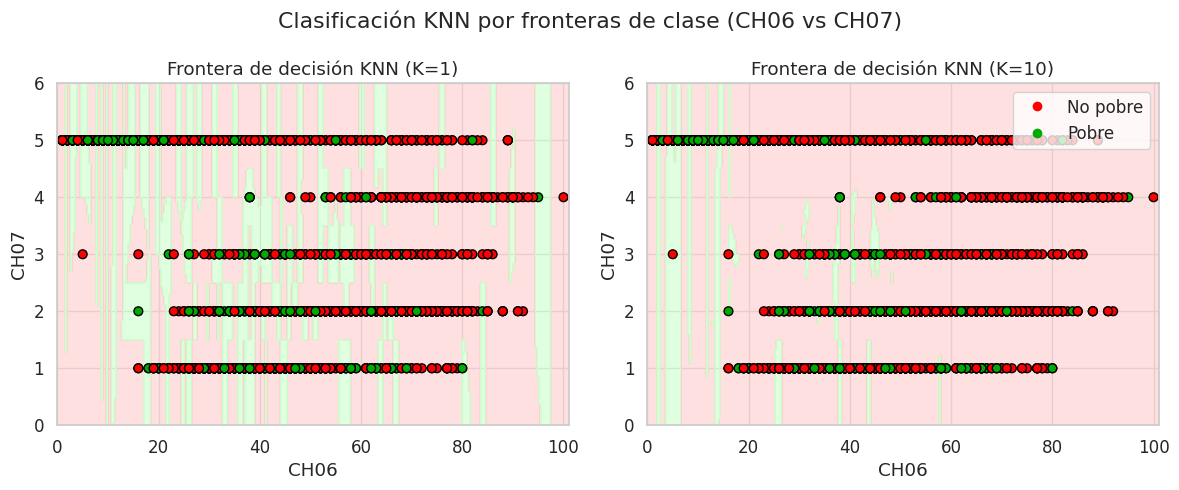

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# Extraer solo las dos características CH06 y CH07
X = X_train[['CH06', 'CH07']].values
y = y_train.values  # Asegúrate de que y_train sea un vector (no un DataFrame)

# Definir los valores de K
k_values = [1, 10]

# Crear malla para la frontera de decisión
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Mapas de color
cmap_light = ListedColormap(['#FFCCCC', '#CCFFCC'])  # fondo
cmap_bold = ListedColormap(['#FF0000', '#00AA00'])   # puntos

# Crear figura
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, k in zip(axes, k_values):
    # Entrenar KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)

    # Predicciones en la malla
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Graficar frontera
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

    # Graficar puntos de entrenamiento
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=40)

    # Etiquetas
    ax.set_title(f'Frontera de decisión KNN (K={k})')
    ax.set_xlabel('CH06')
    ax.set_ylabel('CH07')

# Leyenda
plt.legend(handles=scatter.legend_elements()[0],
           labels=['No pobre', 'Pobre'], loc='upper right')

plt.suptitle('Clasificación KNN por fronteras de clase (CH06 vs CH07)')
plt.tight_layout()
plt.show()


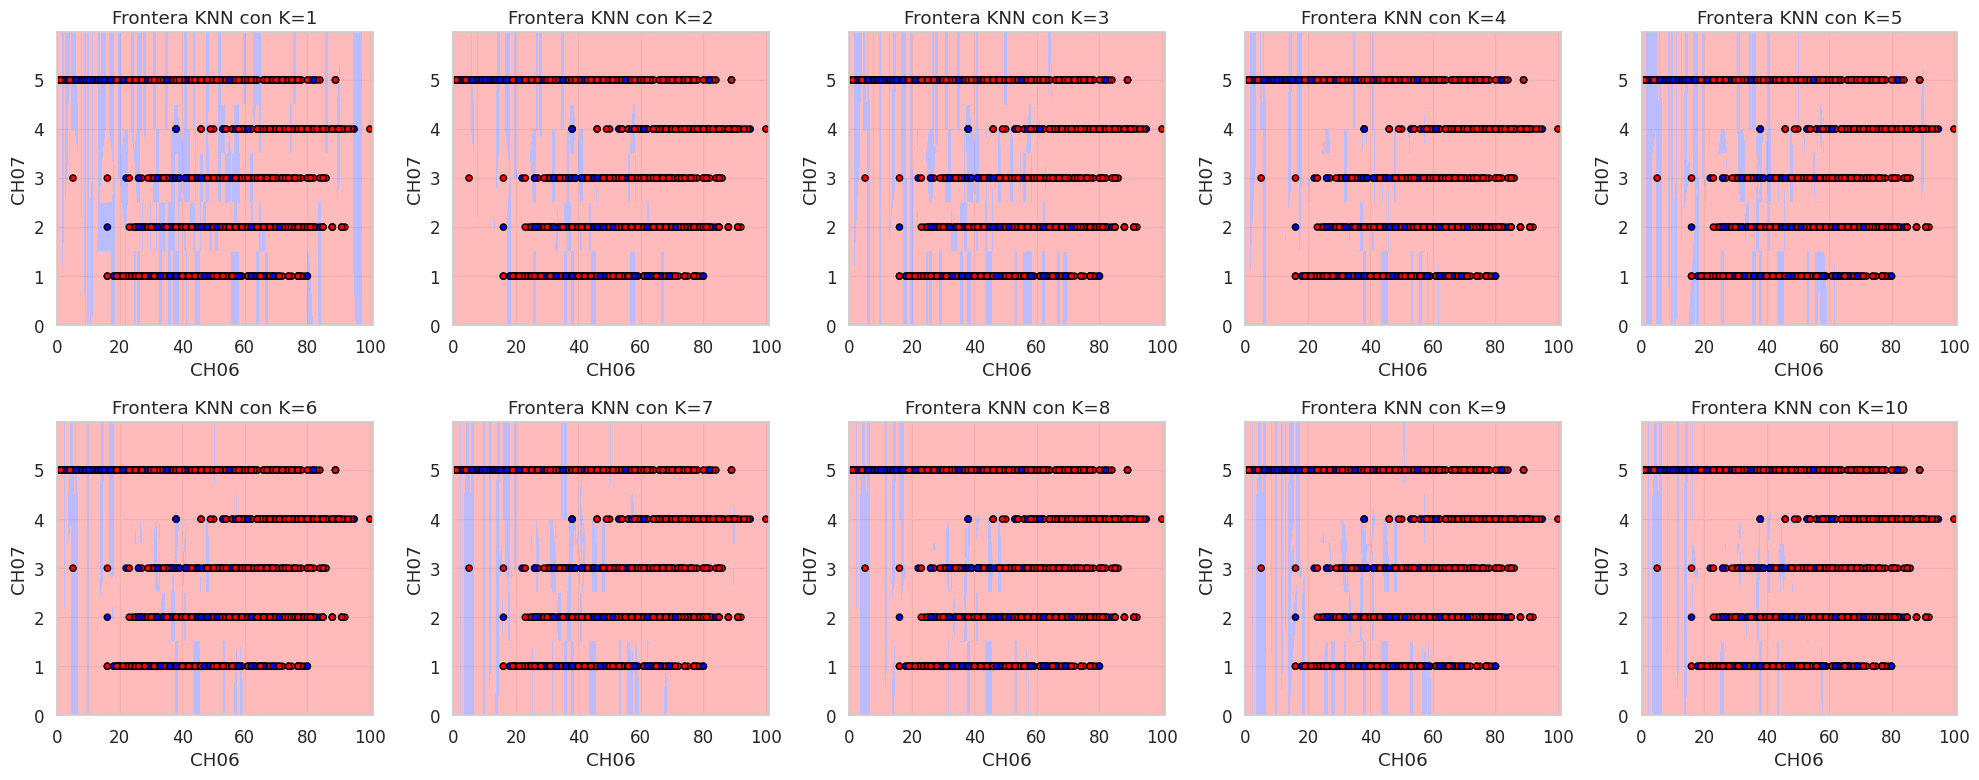

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
# Asegúrate de que tienes X_train y y_train listos para usar
# X_train debe ser un DataFrame de pandas o un array de numpy
# y_train debe ser la variable target (0: no pobre, 1: pobre)

# 1. Selecciona las dos características
# Elige dos de las variables numéricas que mencionaste:
feature_x = 'CH06'  # Reemplaza con una de tus variables
feature_y = 'CH07'  # Reemplaza con otra de tus variables

# 2. Crea los subsets de datos para la visualización
# Solo tomamos las dos columnas seleccionadas
X_plot = X_train[[feature_x, feature_y]].values
y_plot = y_train.values

# Define los colores para el gráfico (por ejemplo, para 2 clases)
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF']) # Colores suaves para el fondo de la frontera
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])   # Colores fuertes para los puntos de entrenamiento

# Definir la función para trazar la frontera de decisión
def plot_decision_boundary(X, y, classifier, ax, title):
    # Paso de la cuadrícula
    h = .02

    # Definir los límites del gráfico
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Crear la cuadrícula de puntos (mesh grid)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predecir las clases para cada punto de la cuadrícula
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Remodelar el resultado a la forma de la cuadrícula
    Z = Z.reshape(xx.shape)

    # Trazar la superficie de la frontera de decisión
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.8)

    # Trazar los puntos de entrenamiento
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
               edgecolor='k', s=20)

    # Configurar etiquetas y título
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel(feature_x)
    ax.set_ylabel(feature_y)
    ax.set_title(title)

# 3. Iterar y graficar para K = 1 a 10
fig, axes = plt.subplots(2, 5, figsize=(20, 8)) # Creamos una figura con 10 subgráficos
axes = axes.flatten() # Aplanamos el array de subgráficos para fácil iteración

k_values = range(1, 11)

for i, k in enumerate(k_values):
    # Entrenar el clasificador KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_plot, y_plot)

    # Llamar a la función de trazado
    plot_decision_boundary(X_plot, y_plot, knn, axes[i],
                           f'Frontera KNN con K={k}')

# Ajustar el layout para que no se superpongan los títulos
plt.tight_layout()
plt.show()

### Ejercicio 7: K optimo por CV

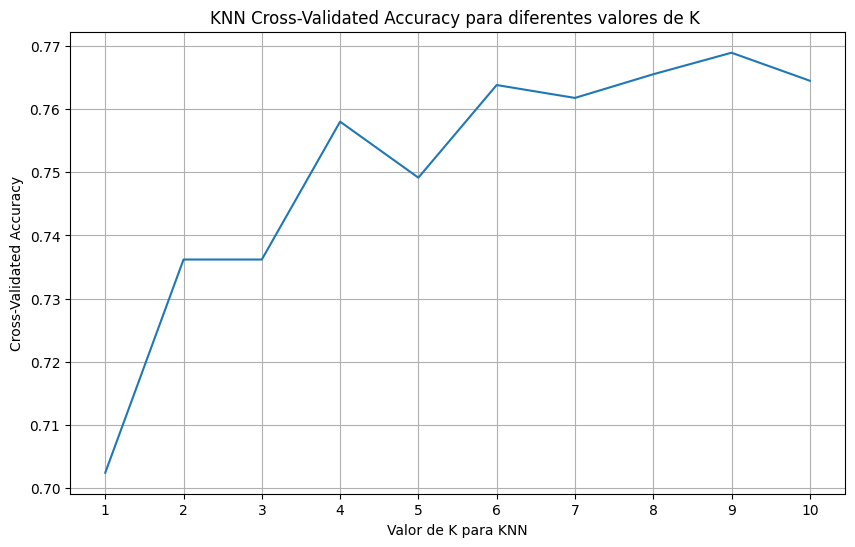

el numero optimo de vecinos (K) es: 9


In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# Definimos el rango de valores k a probar
k_range = range(1, 11)
k_scores = []

# Realizamos validación cruzada de 5-fold para cada K
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

# Graficamos la precisión para cada K
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores)
plt.xlabel('Valor de K para KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Cross-Validated Accuracy para diferentes valores de K ')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

# Find the optimal K
optimal_k = k_range[k_scores.index(max(k_scores))]
print(f"el numero optimo de vecinos (K) es: {optimal_k}")

#D. Modelo de Regresion Logistica con Regularización: Ridg y LASSO

### Ejercicio 8: Visualización

In [23]:
# Definir la grilla de penalidades
n_values = np.arange(-5, 6)  # -5 a 5
lambdas = 10.0** n_values
C_values = 1 / lambdas  # inverso de lambda

# Listas para guardar coeficientes
coef_ridge = []
coef_lasso = []

# Columnas (sin la constante)
feature_names = [col for col in X_train.columns if col != 'const']

In [24]:
# Loop sobre penalidades
for C in C_values:
    # Ridge (L2)
    ridge = LogisticRegression(
        penalty='l2',
        C=C,
        solver='lbfgs',
        max_iter=1000
    )
    ridge.fit(X_train[feature_names], y_train)
    coef_ridge.append(ridge.coef_[0])

    # LASSO (L1)
    lasso = LogisticRegression(
        penalty='l1',
        C=C,
        solver='liblinear',
        max_iter=1000
    )
    lasso.fit(X_train[feature_names], y_train)
    coef_lasso.append(lasso.coef_[0])

In [25]:

# Convertir a DataFrames
coef_ridge = pd.DataFrame(coef_ridge, columns=feature_names, index=np.log10(lambdas))
coef_lasso = pd.DataFrame(coef_lasso, columns=feature_names, index=np.log10(lambdas))

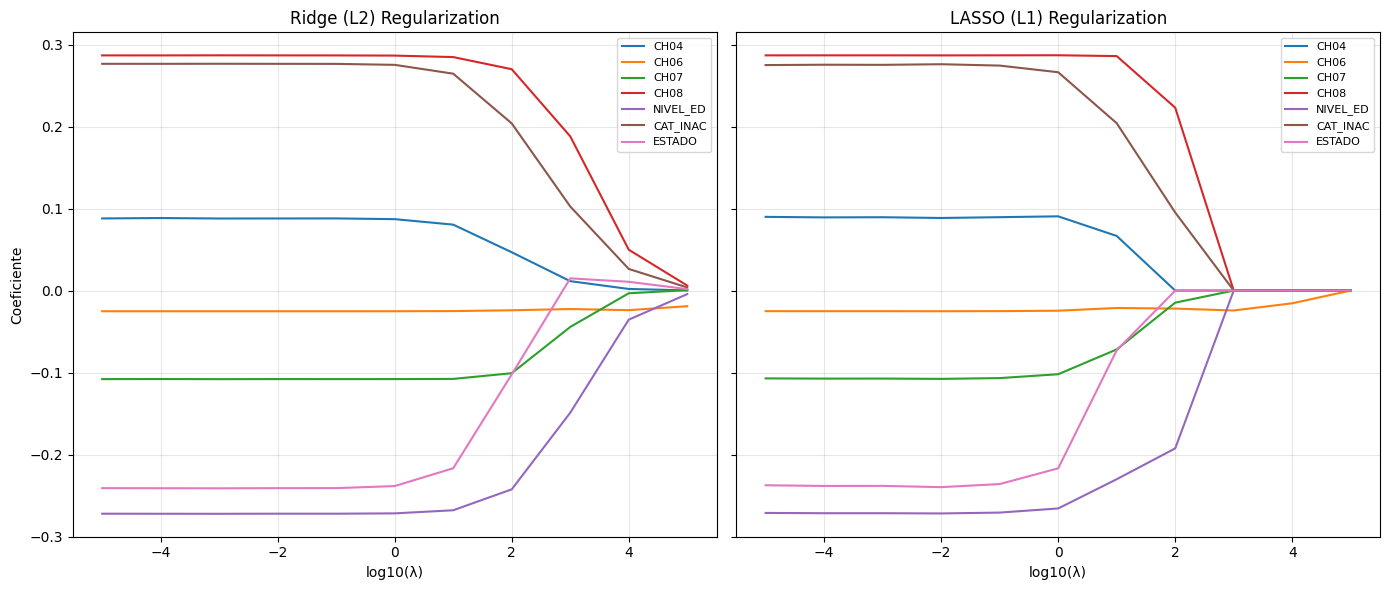

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Panel A - Ridge
for col in coef_ridge.columns:
    axes[0].plot(coef_ridge.index, coef_ridge[col], label=col)
axes[0].set_title("Ridge (L2) Regularization")
axes[0].set_xlabel("log10(λ)")
axes[0].set_ylabel("Coeficiente")
axes[0].legend(loc='best', fontsize=8)
axes[0].grid(alpha=0.3)

# Panel B - LASSO
for col in coef_lasso.columns:
    axes[1].plot(coef_lasso.index, coef_lasso[col], label=col)
axes[1].set_title("LASSO (L1) Regularization")
axes[1].set_xlabel("log10(λ)")
axes[1].legend(loc='best', fontsize=8)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Ejercicio 9: Penalidad optima por Cross-validation y visualización

In [27]:
#Regresión con Ridge (L2 norm)
ridge_cv = LogisticRegressionCV(
    Cs=C_values,          # inversa de lambda
    penalty='l2',
    solver='lbfgs',
    cv=5,                 # 5 particiones (5-fold)
    scoring='accuracy',   # mide desempeño con precisión
    max_iter=10000,
    refit=True
)

ridge_cv.fit(X_train, y_train)

# λ óptimo (recuerda que C = 1/λ)
lambda_ridge_opt = 1 / ridge_cv.C_[0]
print(f"λ óptimo (Ridge): {lambda_ridge_opt:.6f}")

λ óptimo (Ridge): 1000.000000


In [28]:
#Regularización con LASSO (L1 norm)
lasso_cv = LogisticRegressionCV(
    Cs=C_values,
    penalty='l1',
    solver='liblinear',   # obligatorio para LASSO
    cv=5,
    scoring='accuracy',
    max_iter=10000,
    refit=True
)

lasso_cv.fit(X_train, y_train)

lambda_lasso_opt = 1 / lasso_cv.C_[0]
print(f"λ óptimo (LASSO): {lambda_lasso_opt:.6f}")

λ óptimo (LASSO): 1.000000


In [29]:
    #Obtener errores de validación y graficar boxplots
# ----- RIDGE -----
ridge_scores = list(ridge_cv.scores_.values())[0]   # matriz (n_samples, n_C)
ridge_errors = 1 - ridge_scores                     # error = 1 - accuracy
ridge_error_df = pd.DataFrame(ridge_errors, columns=lambdas)

# ----- LASSO -----
lasso_scores = list(lasso_cv.scores_.values())[0]
lasso_errors = 1 - lasso_scores
lasso_error_df = pd.DataFrame(lasso_errors, columns=lambdas)

/tmp/ipython-input-3032839739.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box1 = axes[0].boxplot(
/tmp/ipython-input-3032839739.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box2 = axes[1].boxplot(


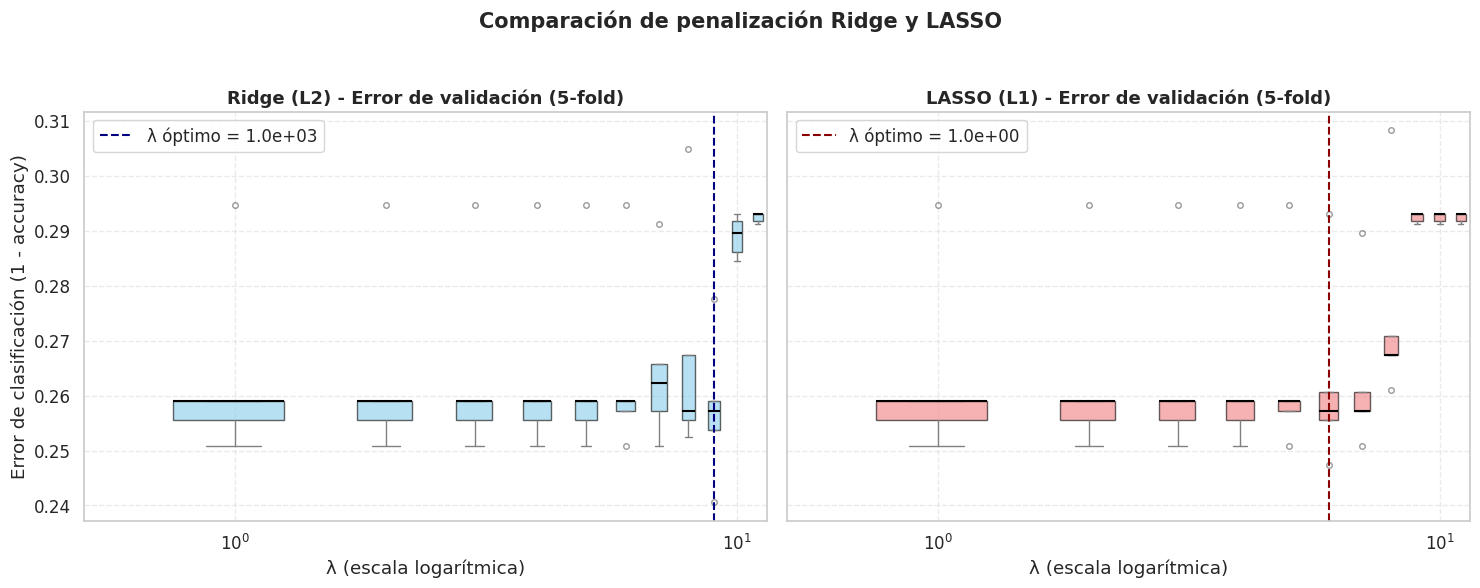

In [30]:
#Estilo general
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Paleta de colores
colors = sns.color_palette("coolwarm", len(lambdas))

# Panel A: Ridge
box1 = axes[0].boxplot(
    ridge_error_df,
    patch_artist=True,
    labels=[f"{l:.0e}" for l in lambdas],
    medianprops=dict(color='black', linewidth=1.5),
    boxprops=dict(facecolor='skyblue', alpha=0.6),
    whiskerprops=dict(color='gray'),
    capprops=dict(color='gray'),
    flierprops=dict(marker='o', markersize=4, color='red', alpha=0.4)
)

axes[0].set_title("Ridge (L2) - Error de validación (5-fold)", fontsize=13, fontweight='bold')
axes[0].set_xlabel("λ (escala logarítmica)")
axes[0].set_ylabel("Error de clasificación (1 - accuracy)")
axes[0].set_xscale('log')
axes[0].grid(True, linestyle='--', alpha=0.4)

# Línea vertical del λ óptimo
axes[0].axvline(x=np.where(lambdas == 1 / ridge_cv.C_[0])[0][0] + 1,
                color='navy', linestyle='--', linewidth=1.5, label=f"λ óptimo = {1 / ridge_cv.C_[0]:.1e}")
axes[0].legend(loc='upper left')

# Panel B: LASSO
box2 = axes[1].boxplot(
    lasso_error_df,
    patch_artist=True,
    labels=[f"{l:.0e}" for l in lambdas],
    medianprops=dict(color='black', linewidth=1.5),
    boxprops=dict(facecolor='lightcoral', alpha=0.6),
    whiskerprops=dict(color='gray'),
    capprops=dict(color='gray'),
    flierprops=dict(marker='o', markersize=4, color='blue', alpha=0.4)
)

axes[1].set_title("LASSO (L1) - Error de validación (5-fold)", fontsize=13, fontweight='bold')
axes[1].set_xlabel("λ (escala logarítmica)")
axes[1].set_xscale('log')
axes[1].grid(True, linestyle='--', alpha=0.4)

axes[1].axvline(x=np.where(lambdas == 1 / lasso_cv.C_[0])[0][0] + 1,
                color='darkred', linestyle='--', linewidth=1.5, label=f"λ óptimo = {1 / lasso_cv.C_[0]:.1e}")
axes[1].legend(loc='upper left')

plt.suptitle("Comparación de penalización Ridge y LASSO", fontsize=15, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

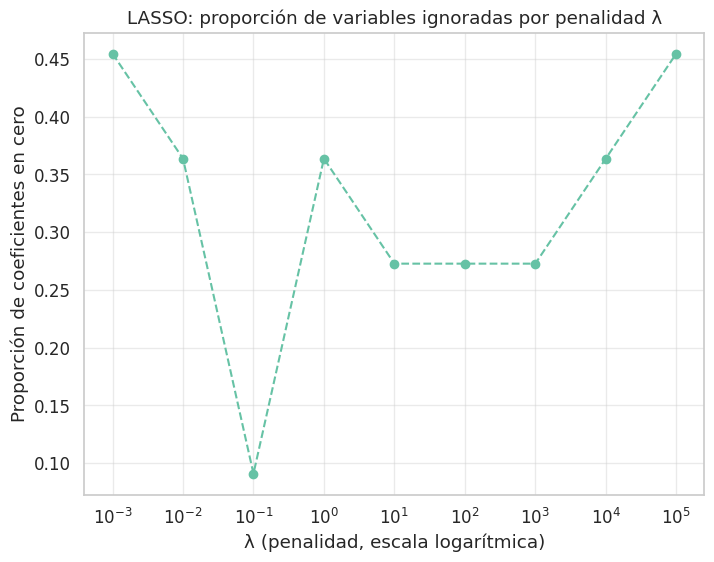

In [31]:
# Extraer los coeficientes del modelo LASSO para la única clase (en binario)
coefs_lasso = lasso_cv.coefs_paths_[list(lasso_cv.coefs_paths_.keys())[0]][0]

# Obtener los C (inversos de lambda) que corresponden a estas columnas
C_used = lasso_cv.Cs_[ -coefs_lasso.shape[1]: ]  # tomar los últimos que efectivamente se usaron
lambda_used = 1 / C_used

# Calcular proporción de coeficientes en cero
prop_zeros = (coefs_lasso == 0).sum(axis=0) / coefs_lasso.shape[0]

# Graficar
plt.figure(figsize=(8,6))
plt.plot(lambda_used, prop_zeros, marker='o', linestyle='--')
plt.xscale('log')
plt.xlabel("λ (penalidad, escala logarítmica)")
plt.ylabel("Proporción de coeficientes en cero")
plt.title("LASSO: proporción de variables ignoradas por penalidad λ")
plt.grid(alpha=0.4)
plt.show()

# E. Desempeño de modelos afuera de la muestra, métricas y politicas públicas

### ejercicio 11

In [64]:
from sklearn.metrics import confusion_matrix

# Realizamos predicciones con el modelo Ridge en el conjunto de prueba (X_test)
# Se utiliza el objeto 'ridge_cv' del modelo Ridge previamente ajustado.
y_pred_ridge = ridge_cv.predict(X_test)

# Calculamos la matriz de confusion
conf_matrix_ridge = confusion_matrix(y_test, y_pred_ridge)

print(f"Matriz de confusion para el modelo logit con Ridge ( λ optimo = {lambda_ridge_opt:.6f}):")
print(conf_matrix_ridge)

Matriz de confusión para el modelo logit con Ridge ( λ optimo = 1000.000000):
[[778  63]
 [310 107]]


In [65]:
from sklearn.metrics import confusion_matrix

# Realizamos las predicciones con el modelo LASSO en el conjunto de prueba (X_test)
# Se utiliza el objeto 'lasso_cv' del modelo LASSO previamente ajustado.
y_pred_lasso = lasso_cv.predict(X_test)

# Calculamos la matriz de confusion
conf_matrix_lasso = confusion_matrix(y_test, y_pred_lasso)

print(f"Matriz de confusion para el modelo Logit con LASSO ( λ optimo= {lambda_lasso_opt:.6f}):")
print(conf_matrix_lasso)

Matriz de confusion para el modelo Logit con LASSO ( λ optimo= 1.000000):
[[760  81]
 [291 126]]


In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Entrenamos el modelo KNN con el valor óptimo de K obtenido mediante cv
# usar los datos de entrenamiento que incluyan todas las características utilizadas para el entrenamiento (X_train, y_train).

knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

# hacemos predicciones en el conjunto de prueba (X_test)
y_pred_knn = knn_optimal.predict(X_test)

# calculamos la matriz de confusion
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print(f"matriz de confusion para el modelo KNN con K optimo ({optimal_k}):")
print(conf_matrix_knn)

matriz de confusion para el modelo KNN con K optimo (9):
[[726 115]
 [202 215]]


In [67]:
from sklearn.metrics import confusion_matrix

# Realizamos predicciones con el modelo Logit en el conjunto de prueba (X_test)
# Se utiliza el objeto 'result' del modelo Logit ajustado previamente
y_pred_proba_logit = result.predict(X_test)

# Conviertimos las probabilidades en predicciones binarias utilizando un umbral de 0,5.
y_pred_logit = (y_pred_proba_logit > 0.5).astype(int)

# Calculamos la matriz de confusion
conf_matrix_logit = confusion_matrix(y_test, y_pred_logit)

print("matriz de confusion del modelo logit (umbral > 0.5):")
print(conf_matrix_logit)

matriz de confusion del modelo logit (umbral > 0.5):
[[757  84]
 [290 127]]


In [71]:
from sklearn.metrics import roc_curve, auc

# Calculamos la curva ROC y  AUC para el modelo Logit
fpr_logit, tpr_logit, thresholds_logit = roc_curve(y_test, y_pred_proba_logit)
auc_logit = auc(fpr_logit, tpr_logit)

# Calculamos curva de ROC  y AUC para KNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn)
auc_knn = auc(fpr_knn, tpr_knn)

# Calculamos la curva de ROC y AUC para el modelo LASSO
fpr_lasso, tpr_lasso, thresholds_lasso = roc_curve(y_test, y_pred_proba_lasso)
auc_lasso = auc(fpr_lasso, tpr_lasso)

# Calculamos la curva de ROC  y AUC para Ridge
fpr_ridge, tpr_ridge, thresholds_ridge = roc_curve(y_test, y_pred_proba_ridge)
auc_ridge = auc(fpr_ridge, tpr_ridge)

# Print AUC scores
print(f"AUC para Logit : {auc_logit:.4f}")
print(f"AUC para KNN : {auc_knn:.4f}")
print(f"AUC para LASSO : {auc_lasso:.4f}")
print(f"AUC para Ridge : {auc_ridge:.4f}")

AUC para Logit : 0.7659
AUC para KNN : 0.7723
AUC para LASSO : 0.7664
AUC para Ridge : 0.7581


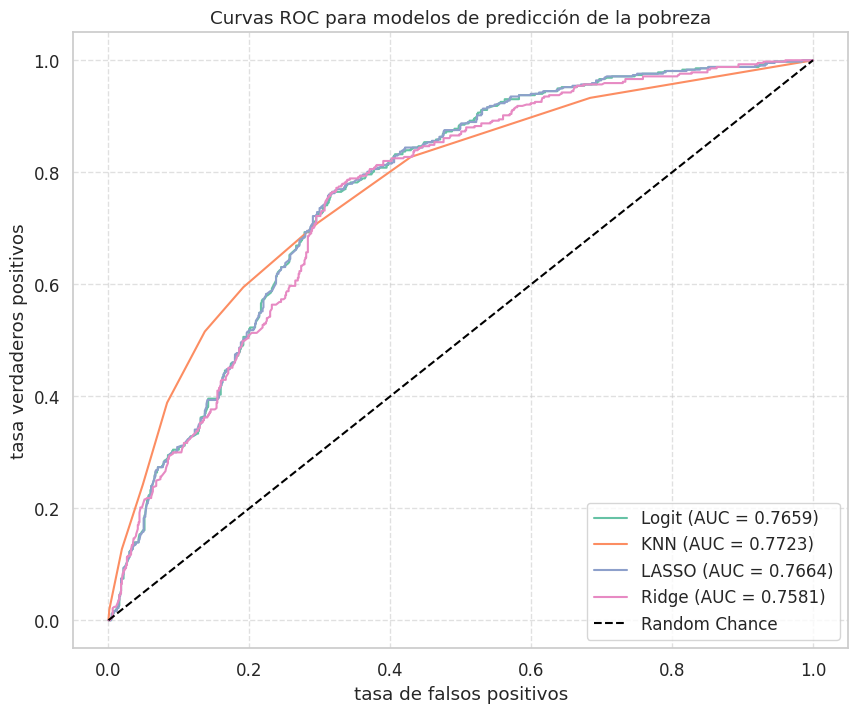

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# graficamos la curva de ROC para Logit
plt.plot(fpr_logit, tpr_logit, label=f'Logit (AUC = {auc_logit:.4f})')

# graficamos la curva de ROC para KNN
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.4f})')

# graficamos la curva de  ROC para LASSO
plt.plot(fpr_lasso, tpr_lasso, label=f'LASSO (AUC = {auc_lasso:.4f})')

# graficamos la curva de ROC para Ridge
plt.plot(fpr_ridge, tpr_ridge, label=f'Ridge (AUC = {auc_ridge:.4f})')

# graficamos una diagonal
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

# Set labels and title
plt.xlabel('tasa de falsos positivos')
plt.ylabel('tasa verdaderos positivos')
plt.title('Curvas ROC para modelos de predicción de la pobreza')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

In [76]:
#calculamos las metricas de clasificacion

from sklearn.metrics import accuracy_score, f1_score

# Calcular la precisión para cada modelo
accuracy_logit = accuracy_score(y_test, y_pred_logit)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_lasso = accuracy_score(y_test, y_pred_lasso)
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)

# Calcula la puntuación F1 para cada modelo.
f1_logit = f1_score(y_test, y_pred_logit)
f1_knn = f1_score(y_test, y_pred_knn)
f1_lasso = f1_score(y_test, y_pred_lasso)
f1_ridge = f1_score(y_test, y_pred_ridge)

# visualizamos las metricas
print(f"Logit :")
print(f"  Accuracy: {accuracy_logit:.4f}")
print(f"  F1-Score: {f1_logit:.4f}")
print(f"\nKNN :")
print(f"  Accuracy: {accuracy_knn:.4f}")
print(f"  F1-Score: {f1_knn:.4f}")
print(f"\nLASSO :")
print(f"  Accuracy: {accuracy_lasso:.4f}")
print(f"  F1-Score: {f1_lasso:.4f}")
print(f"\nRidge :")
print(f"  Accuracy: {accuracy_ridge:.4f}")
print(f"  F1-Score: {f1_ridge:.4f}")

Logit :
  Accuracy: 0.7027
  F1-Score: 0.4045

KNN :
  Accuracy: 0.7480
  F1-Score: 0.5756

LASSO :
  Accuracy: 0.7043
  F1-Score: 0.4038

Ridge :
  Accuracy: 0.7035
  F1-Score: 0.3646
